# Navigating Fertile Days: Predictive Analysis and Insights from Menstrual Cycle Length Data

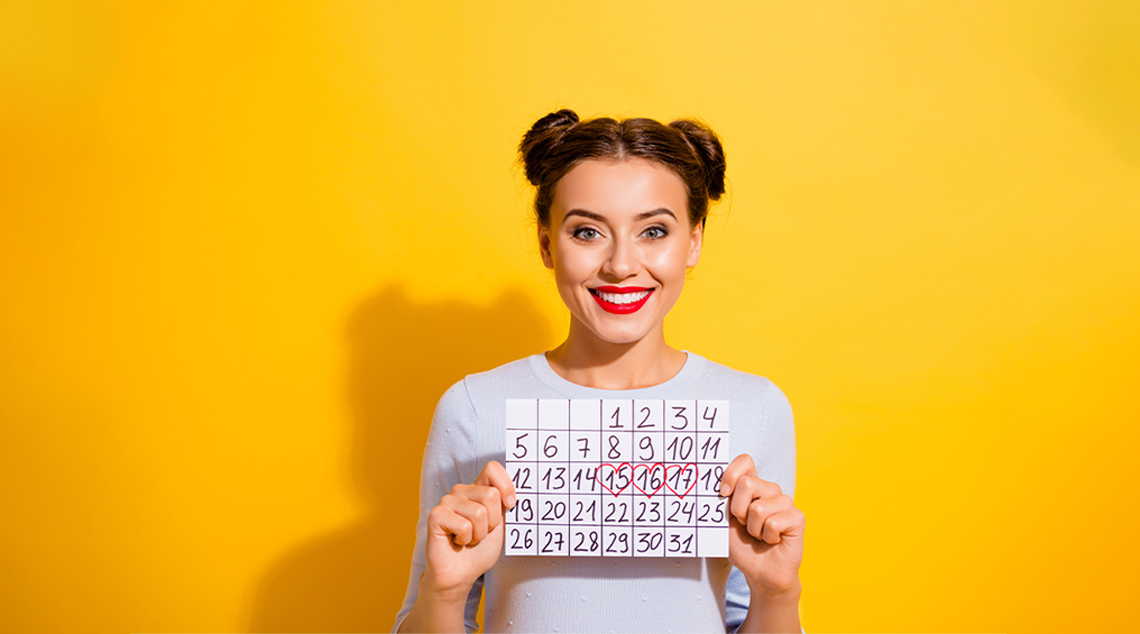

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('menstrual_cycle.csv')

In [51]:
df.head()

,new_id,age,cycle_number,cycle_start_date,cycle_end_date,cycle_length,conception_cycle
0,1,26,1,5/21/03,6/16/03,27.0,No
1,1,26,2,6/17/03,7/15/03,29.0,No
2,1,26,3,7/16/03,8/13/03,NaN,Yes
3,2,28,2,06-09-2003,07-05-2003,27.0,No
4,2,28,3,07-06-2003,08-09-2003,NaN,Yes


In [52]:
df.tail()

,new_id,age,cycle_number,cycle_start_date,cycle_end_date,cycle_length,conception_cycle
3319,580,32,3,5/19/11,6/14/11,27.0,No
3320,580,32,4,6/15/11,7/14/11,30.0,No
3321,580,32,5,7/15/11,08-11-2011,28.0,No
3322,580,32,6,08-12-2011,09-10-2011,30.0,No
3323,581,30,1,06-02-2011,07-12-2011,41.0,No


In [53]:
df.shape

(3324, 7)

In [54]:
df.columns

Index(['new_id', 'age', 'cycle_number', 'cycle_start_date', 'cycle_end_date',
       'cycle_length', 'conception_cycle'],
      dtype='object')

In [55]:
df.duplicated().sum()

0

In [56]:
df.isnull().sum()

new_id                0
age                   0
cycle_number          0
cycle_start_date      0
cycle_end_date        0
cycle_length        180
conception_cycle      0
dtype: int64

In [57]:
df['cycle_length'].interpolate(method='linear', inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   new_id            3324 non-null   int64  
 1   age               3324 non-null   int64  
 2   cycle_number      3324 non-null   int64  
 3   cycle_start_date  3324 non-null   object 
 4   cycle_end_date    3324 non-null   object 
 5   cycle_length      3324 non-null   float64
 6   conception_cycle  3324 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 181.9+ KB


In [59]:
df.describe()

,new_id,age,cycle_number,cycle_length
count,3324.000000,3324.000000,3324.000000,3324.000000
mean,293.789410,27.247894,6.333333,30.326414
std,160.745226,4.316675,3.930202,6.624301
min,1.000000,18.000000,1.000000,15.000000
25%,153.000000,24.000000,3.000000,27.000000
50%,287.000000,27.000000,6.000000,29.000000
75%,434.000000,30.000000,9.000000,32.000000
max,581.000000,40.000000,26.000000,98.000000


In [60]:
df.nunique()

new_id               581
age                   23
cycle_number          26
cycle_start_date    2085
cycle_end_date      2076
cycle_length          89
conception_cycle       3
dtype: int64

In [61]:
df['cycle_start_date'] = pd.to_datetime(df['cycle_start_date'])
df['cycle_end_date'] = pd.to_datetime(df['cycle_end_date'])

In [62]:
print(df['conception_cycle'].value_counts())

No         3137
Yes         180
Missing       7
Name: conception_cycle, dtype: int64


In [63]:
import plotly.express as px

fig = px.pie(df, names='conception_cycle', title='Distribution of Conception Cycles')
fig.show()

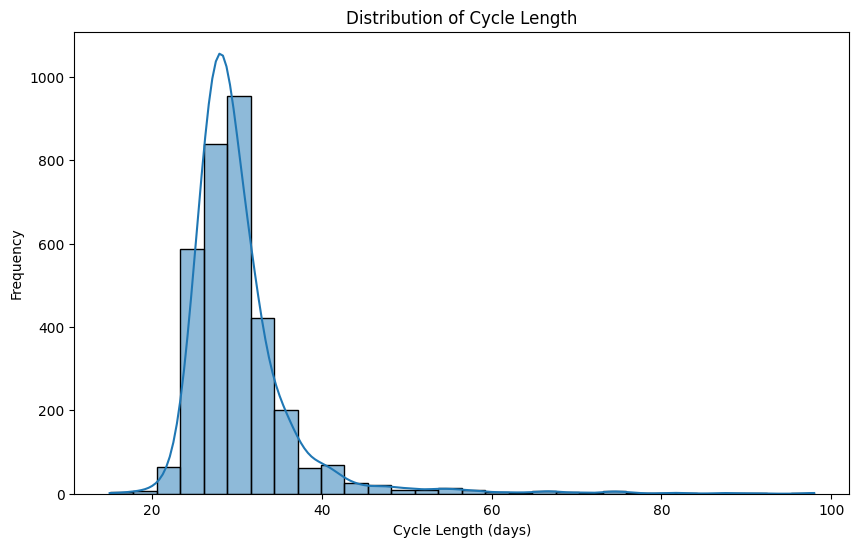

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cycle_length'], bins=30, kde=True)
plt.title('Distribution of Cycle Length')
plt.xlabel('Cycle Length (days)')
plt.ylabel('Frequency')
plt.show()

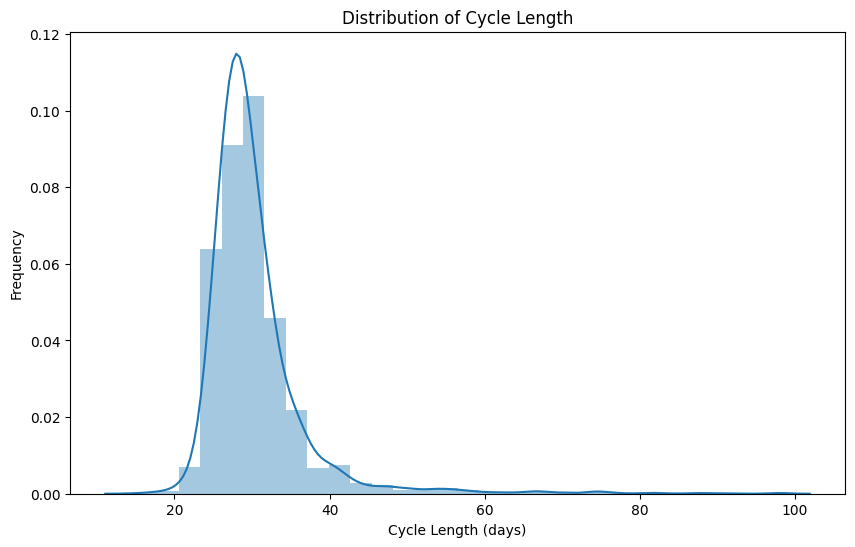

In [65]:
plt.figure(figsize=(10, 6))
sns.distplot(df['cycle_length'], bins=30, kde=True)
plt.title('Distribution of Cycle Length')
plt.xlabel('Cycle Length (days)')
plt.ylabel('Frequency')
plt.show()

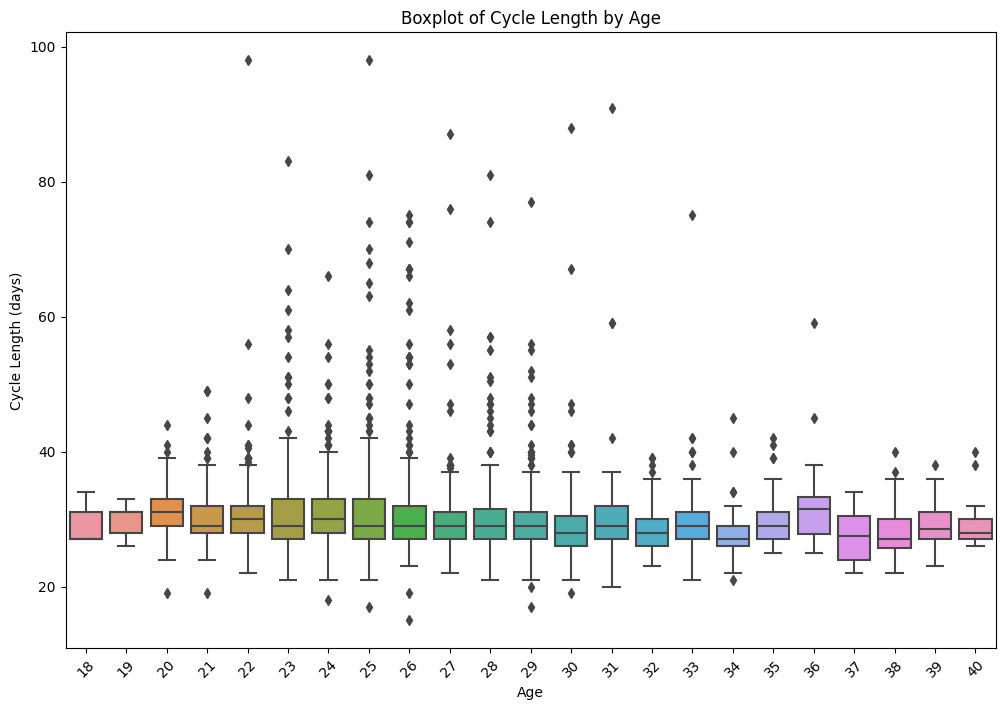

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age', y='cycle_length', data=df)
plt.title('Boxplot of Cycle Length by Age')
plt.xlabel('Age')
plt.ylabel('Cycle Length (days)')
plt.xticks(rotation=45)
plt.show()

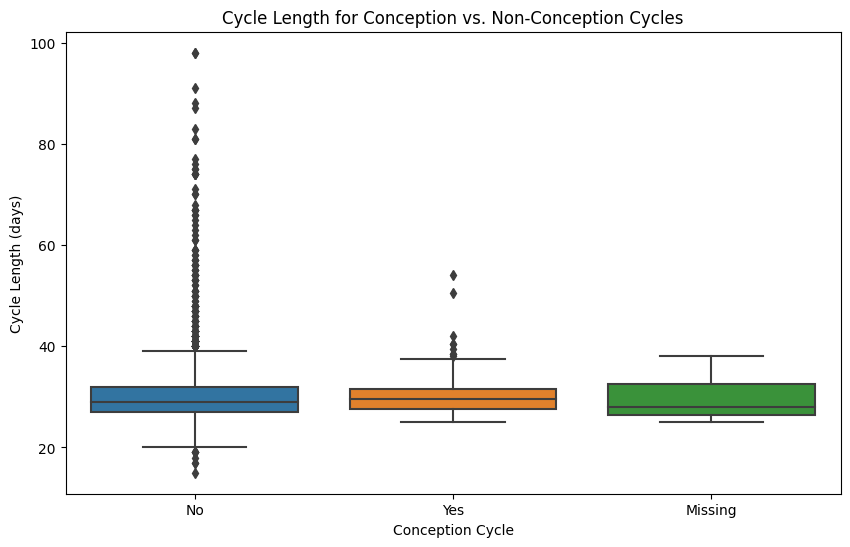

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='conception_cycle', y='cycle_length', data=df)
plt.title('Cycle Length for Conception vs. Non-Conception Cycles')
plt.xlabel('Conception Cycle')
plt.ylabel('Cycle Length (days)')
plt.show()

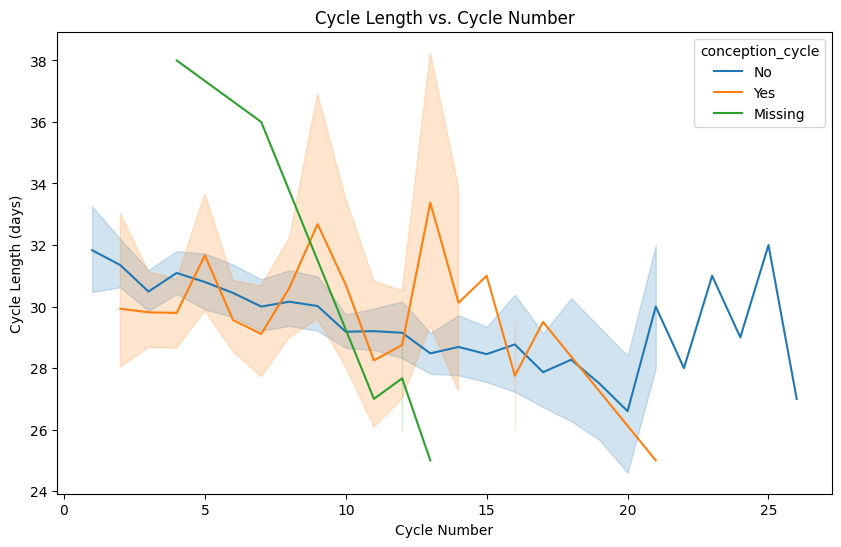

In [68]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='cycle_number', y='cycle_length', hue='conception_cycle', data=df)
plt.title('Cycle Length vs. Cycle Number')
plt.xlabel('Cycle Number')
plt.ylabel('Cycle Length (days)')
plt.show()

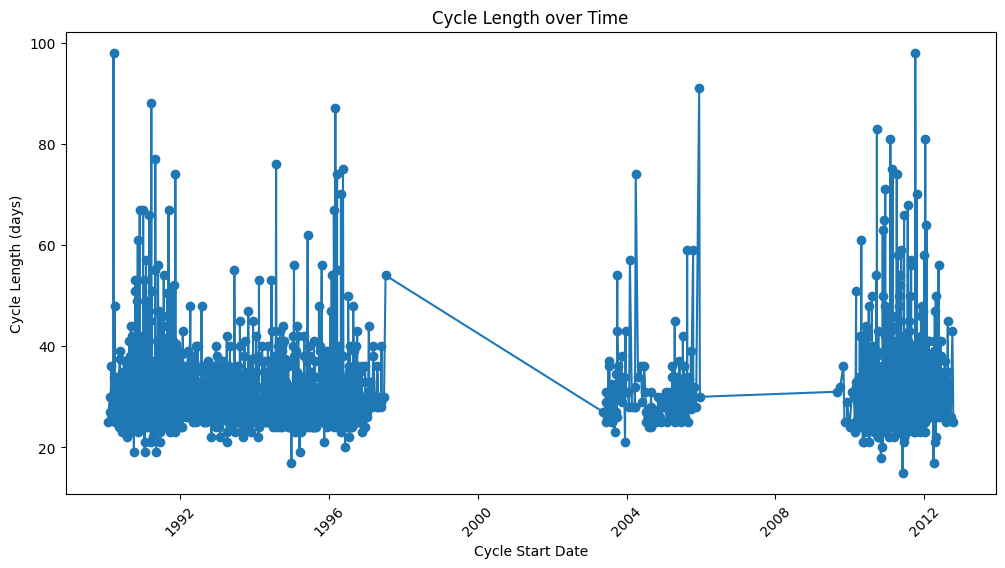

In [69]:
plt.figure(figsize=(12, 6))
df['cycle_start_date'] = pd.to_datetime(df['cycle_start_date'])
df = df.sort_values(by='cycle_start_date')
plt.plot(df['cycle_start_date'], df['cycle_length'], marker='o')
plt.title('Cycle Length over Time')
plt.xlabel('Cycle Start Date')
plt.ylabel('Cycle Length (days)')
plt.xticks(rotation=45)
plt.show()

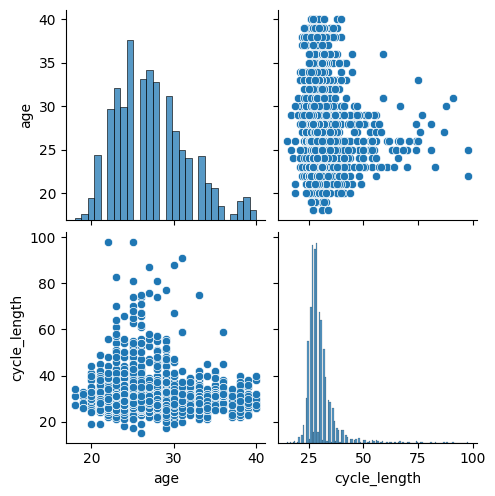

In [70]:
sns.pairplot(df[['age', 'cycle_length']])
plt.show()

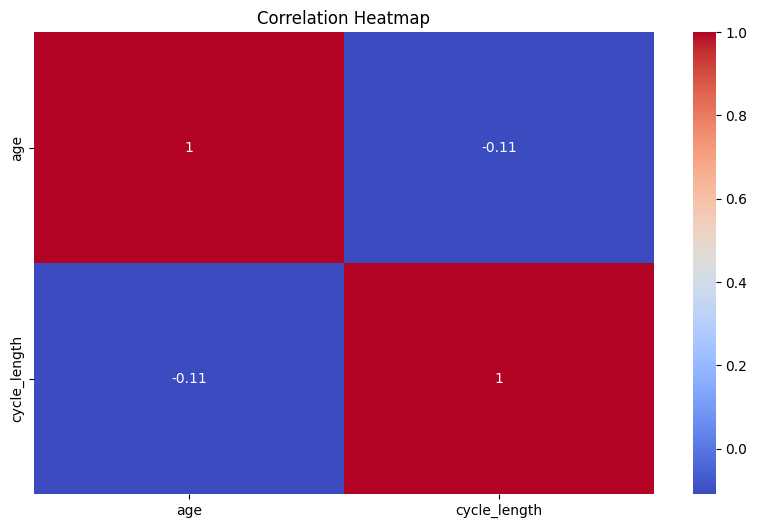

In [71]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['age', 'cycle_length']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

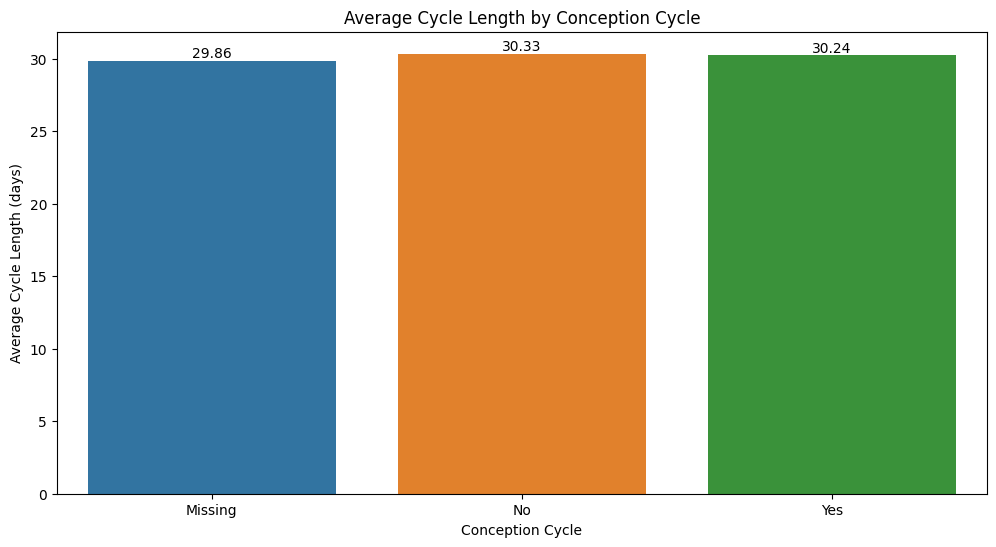

In [72]:
avg_cycle_length = df.groupby('conception_cycle')['cycle_length'].mean().reset_index()

plt.figure(figsize=(12, 6)) 
sns.barplot(x='conception_cycle', y='cycle_length', data=avg_cycle_length)

plt.title('Average Cycle Length by Conception Cycle')
plt.xlabel('Conception Cycle')
plt.ylabel('Average Cycle Length (days)')

for index, row in avg_cycle_length.iterrows():
    plt.text(
        index,                         
        row['cycle_length'] + 0.2,      
        round(row['cycle_length'], 2),  
        color='black',                  
        ha='center'                    
    )

plt.show()

In [73]:
df

,new_id,age,cycle_number,cycle_start_date,cycle_end_date,cycle_length,conception_cycle
768,146,25,2,1990-01-21,1990-02-14,25.0,No
1273,231,33,1,1990-02-09,1990-03-10,30.0,No
769,146,25,3,1990-02-15,1990-03-13,27.0,No
1252,229,23,2,1990-02-23,1990-03-30,36.0,No
780,147,26,2,1990-03-06,1990-04-04,30.0,No
...,...,...,...,...,...,...,...
2714,472,26,15,2012-08-26,2012-09-25,31.0,No
2847,491,26,11,2012-08-26,2012-09-29,35.0,No
2557,444,29,15,2012-09-17,2012-10-12,26.0,No
2324,402,25,11,2012-10-03,2012-11-14,43.0,No


In [74]:
df['cycle_duration'] = (df['cycle_end_date'] - df['cycle_start_date']).dt.days

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [76]:
label_encoder = LabelEncoder()
df['conception_cycle'] = label_encoder.fit_transform(df['conception_cycle'])

In [77]:
features = ['age', 'cycle_number', 'cycle_length', 'cycle_duration']
X = df[features]
y = df['conception_cycle']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [79]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
y_pred = model.predict(X_test)

In [81]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9909774436090225
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      1.00       628
           2       1.00      0.86      0.93        36

    accuracy                           0.99       665
   macro avg       0.66      0.62      0.64       665
weighted avg       0.99      0.99      0.99       665



In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [84]:
y_pred = model.predict(X_test)

In [85]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9729323308270676
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.99       628
           2       1.00      0.53      0.69        36

    accuracy                           0.97       665
   macro avg       0.66      0.51      0.56       665
weighted avg       0.97      0.97      0.97       665



In [86]:
from sklearn.svm import SVC

In [87]:
model = SVC(kernel='linear', random_state=42)  
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [88]:
y_pred = model.predict(X_test)

In [89]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9849624060150376
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99       628
           2       1.00      0.75      0.86        36

    accuracy                           0.98       665
   macro avg       0.66      0.58      0.62       665
weighted avg       0.98      0.98      0.98       665



In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model = DecisionTreeClassifier(random_state=42)  
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [92]:
y_pred = model.predict(X_test)

In [93]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.98796992481203
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.99      0.99       628
           2       0.97      0.94      0.96        36

    accuracy                           0.99       665
   macro avg       0.66      0.65      0.65       665
weighted avg       0.99      0.99      0.99       665



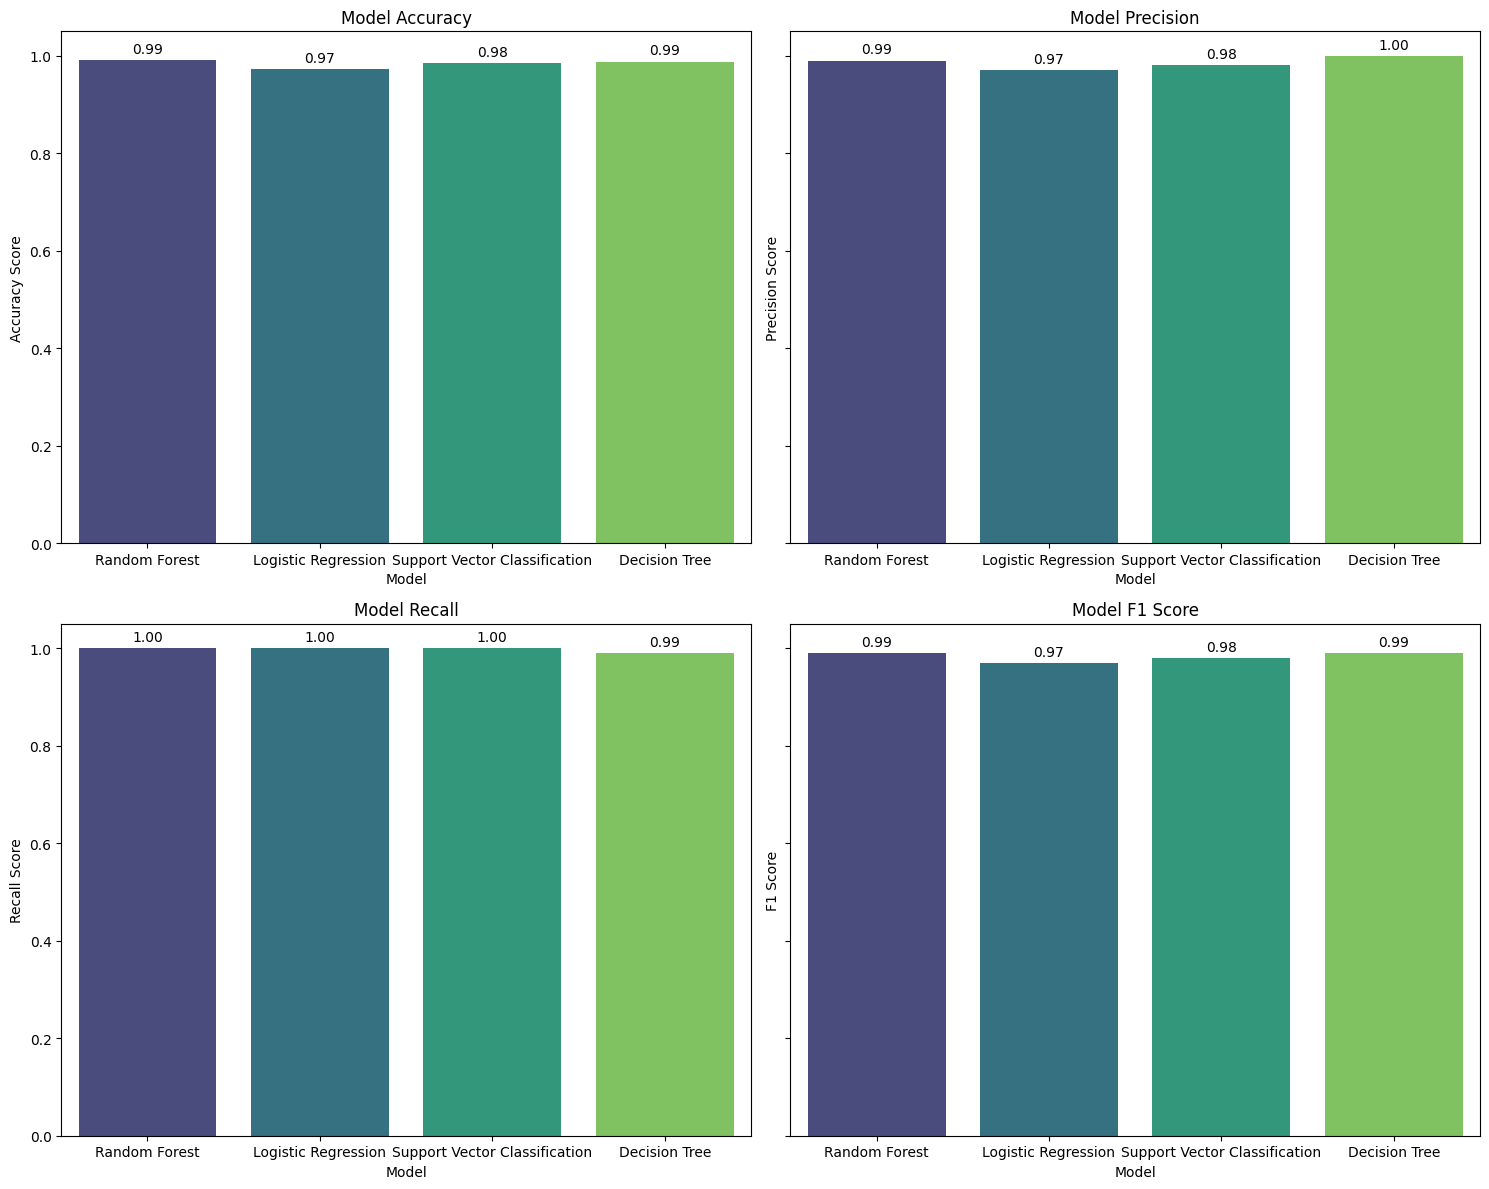

In [94]:
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Support Vector Classification', 'Decision Tree'],
    'Accuracy': [0.9909774436090225, 0.9729323308270676, 0.9849624060150376, 0.98796992481203],
    'Precision': [0.99, 0.97, 0.98, 1.00],
    'Recall': [1.00, 1.00, 1.00, 0.99],
    'F1 Score': [0.99, 0.97, 0.98, 0.99]
}

df = pd.DataFrame(data)

df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey=True)

def add_annotations(ax, data):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')

sns.barplot(x='Model', y='Score', data=df_melted[df_melted['Metric'] == 'Accuracy'], ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Model Accuracy')
axes[0, 0].set_ylabel('Accuracy Score')
add_annotations(axes[0, 0], df_melted[df_melted['Metric'] == 'Accuracy'])

sns.barplot(x='Model', y='Score', data=df_melted[df_melted['Metric'] == 'Precision'], ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Model Precision')
axes[0, 1].set_ylabel('Precision Score')
add_annotations(axes[0, 1], df_melted[df_melted['Metric'] == 'Precision'])

sns.barplot(x='Model', y='Score', data=df_melted[df_melted['Metric'] == 'Recall'], ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Model Recall')
axes[1, 0].set_ylabel('Recall Score')
add_annotations(axes[1, 0], df_melted[df_melted['Metric'] == 'Recall'])

sns.barplot(x='Model', y='Score', data=df_melted[df_melted['Metric'] == 'F1 Score'], ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Model F1 Score')
axes[1, 1].set_ylabel('F1 Score')
add_annotations(axes[1, 1], df_melted[df_melted['Metric'] == 'F1 Score'])

plt.tight_layout()
plt.show()

# Thanks !!!